* **We will compare the time complexity of simple recursive solution vs memoized and then finally the one implemented using Dynamic Programming**

In [1]:
# Test cases
T0 = {
    'input': {
        'seq1': 'serendipitous',
        'seq2': 'precipitation'
    },
    'output': 7
}

T1 = {
    'input': {
        'seq1': [1, 3, 5, 6, 7, 2, 5, 2, 3],
        'seq2': [6, 2, 4, 7, 1, 5, 6, 2, 3]
    },
    'output': 5
}

T2 = {
    'input': {
        'seq1': 'longest',
        'seq2': 'stone'
    },
    'output': 3
}

T3 = {
    'input': {
        'seq1': 'asdfwevad',
        'seq2': 'opkpoiklklj'
    },
    'output': 0
}

T4 = {
    'input': {
        'seq1': 'dense',
        'seq2': 'condensed'
    },
    'output': 5
}

T5 = {
    'input': {
        'seq1': '',
        'seq2': 'opkpoiklklj'
    },
    'output': 0
}

T6 = {
    'input': {
        'seq1': '',
        'seq2': ''
    },
    'output': 0
}

T7 = {
    'input': {
        'seq1': 'abcdef',
        'seq2': 'badcfe'
    },
    'output': 3
}

! 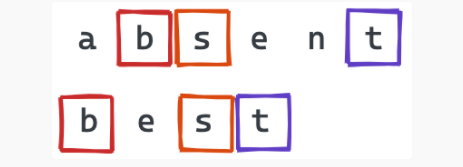

* For simple recursive solution, the complexity analysis is as follows

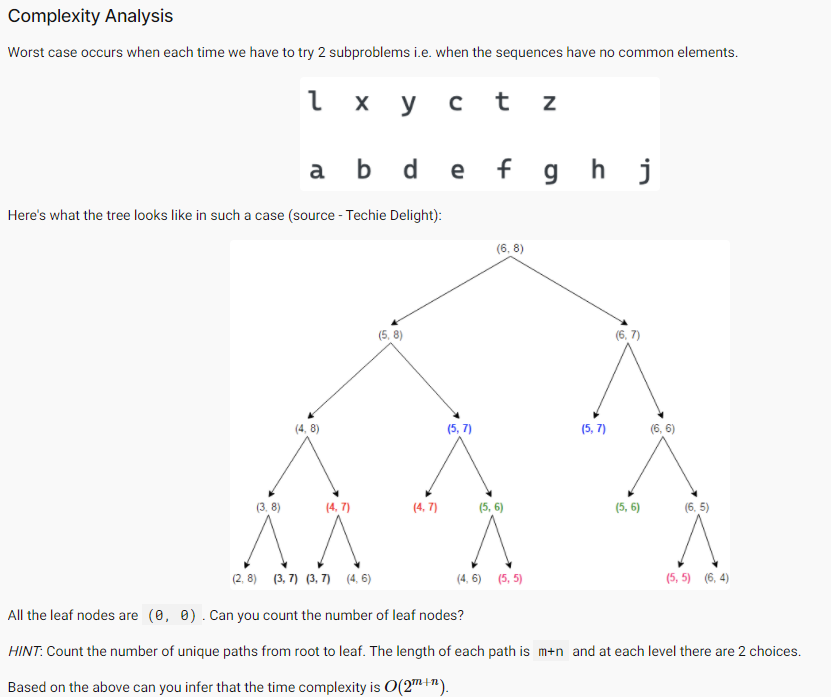

In [6]:
def lcq_recursive(seq1,seq2,idx1=0,idx2=0):

  if idx1==len(seq1) or idx2==len(seq2):
    return 0

  if seq1[idx1]==seq2[idx2]:
    return 1 +lcq_recursive(seq1,seq2,idx1+1,idx2+1)
  else:
    return max(lcq_recursive(seq1,seq2,idx1+1,idx2),lcq_recursive(seq1,seq2,idx1,idx2+1))


In [15]:
%%time

lcq_recursive(**T7['input']),lcq_recursive(**T3['input']),lcq_recursive(**T1['input'])

CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 150 ms


(3, 0, 5)

* Now Memoized Solution

In [22]:
memo={}
def lcq_memoized(seq1,seq2,idx1=0,idx2=0):

  #memo={}

  key=idx1,idx2
  if key in memo:
    return memo[key]

  if idx1==len(seq1) or idx2==len(seq2):
    memo[key]=0
    #return 0

  elif seq1[idx1]==seq2[idx2]:
    #return 1 +lcq_recursive(seq1,seq2,idx1+1,idx2+1)
    memo[key]=1+lcq_memoized(seq1,seq2,idx1+1,idx2+1)
  else:
    #return max(lcq_recursive(seq1,seq2,idx1+1,idx2),lcq_recursive(seq1,seq2,idx1,idx2+1))
    memo[key]=max(lcq_memoized(seq1,seq2,idx1+1,idx2),lcq_memoized(seq1,seq2,idx1,idx2+1))

  return memo[key]

* So we should be initializing the memo dict outside the recusive function, otherwise it is initialized again and again

In [26]:
%%time

lcq_memoized(**T7['input']),lcq_memoized(**T3['input']),lcq_memoized(**T1['input'])

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 12.4 µs


(3, 3, 3)

In [16]:
def lcq_memoized(seq1, seq2):
    memo = {}
    
    def recurse(idx1, idx2):
        key = idx1, idx2
        
        if key in memo:
            return memo[key]
        
        if idx1 == len(seq1) or idx2 == len(seq2):
            memo[key] = 0
        elif seq1[idx1] == seq2[idx2]:
            memo[key] = 1 + recurse(idx1+1, idx2+1)
        else:
            memo[key] = max(recurse(idx1+1, idx2), 
                            recurse(idx1, idx2+1))
        return memo[key]
        
    return recurse(0, 0)

In [17]:
%%time

lcq_memoized(**T7['input']),lcq_memoized(**T3['input']),lcq_memoized(**T1['input'])

CPU times: user 354 µs, sys: 0 ns, total: 354 µs
Wall time: 359 µs


(3, 0, 5)

* **Now the dynamic programming version**

In [49]:
def lcq_dp(seq1,seq2):

  n1,n2=len(seq1),len(seq2)
  table=[[0 for _ in range(n2+1)] for _ in range(n1+1)]
  #print(table)  
  for idx1 in range(n1):
    #print(table)
    for idx2 in range(n2):
      if seq1[idx1]==seq2[idx2]:
        table[idx1+1][idx2+1]=1 +table[idx1][idx2]
      else:
        table[idx1+1][idx2+1]=max(table[idx1][idx2+1],
                                  table[idx1+1][idx2])
  return table[-1][-1]

In [50]:
%%time

lcq_dp(**T7['input']),lcq_dp(**T3['input']),lcq_dp(**T1['input'])

CPU times: user 271 µs, sys: 0 ns, total: 271 µs
Wall time: 278 µs


(3, 0, 5)

## Now we will sove the knapsack problem

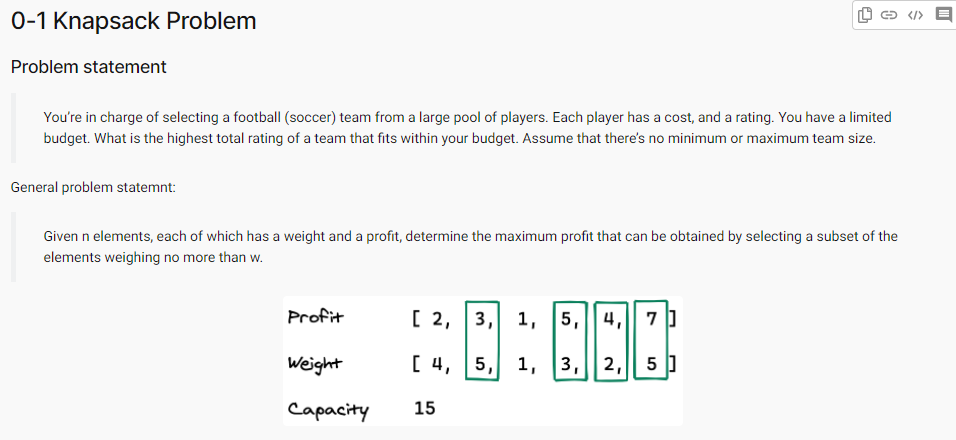

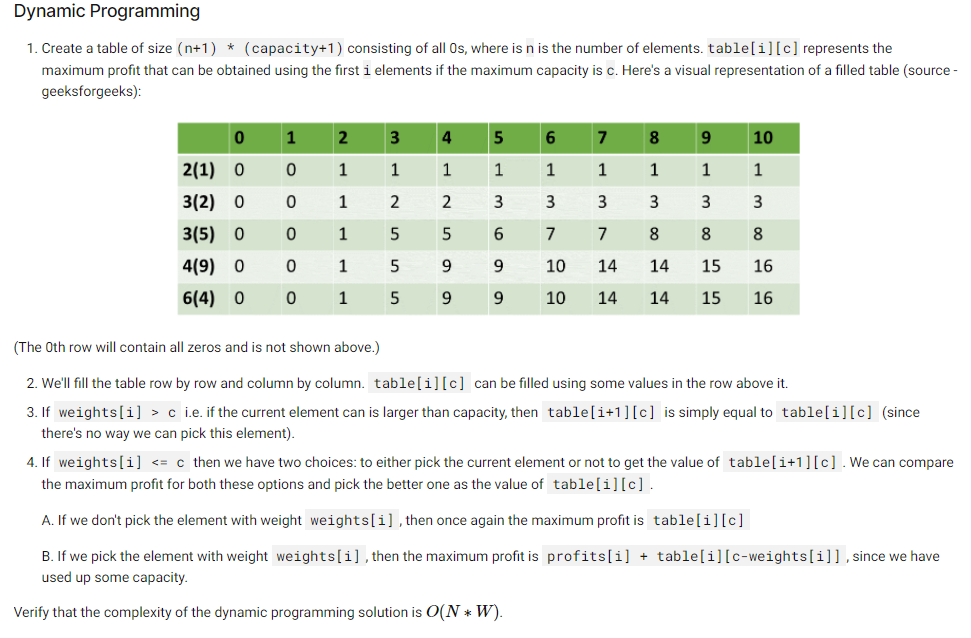

In [57]:
def max_profits_recursive(capacity,weights,profits,idx=0):

  
  if idx==len(weights):
    return 0

  if weights[idx] > capacity:
    return max_profits_recursive(capacity,weights,profits,idx+1)
  
  else:
    return max(max_profits_recursive(capacity,weights,profits,idx+1),
               profits[idx]+max_profits_recursive(capacity-weights[idx],weights,profits,idx+1))

In [53]:
test0 = {
    'input': {
        'capacity': 165,
        'weights': [23, 31, 29, 44, 53, 38, 63, 85, 89, 82],
        'profits': [92, 57, 49, 68, 60, 43, 67, 84, 87, 72]
    },
    'output': 309
}

test1 = {
    'input': {
        'capacity': 3,
        'weights': [4, 5, 6],
        'profits': [1, 2, 3]
    },
    'output': 0
}

test2 = {
    'input': {
        'capacity': 4,
        'weights': [4, 5, 1],
        'profits': [1, 2, 3]
    },
    'output': 3
}

test3 = {
    'input': {
        'capacity': 170,
        'weights': [41, 50, 49, 59, 55, 57, 60],
        'profits': [442, 525, 511, 593, 546, 564, 617]
    },
    'output': 1735
}

test4 = {
    'input': {
        'capacity': 15,
        'weights': [4, 5, 6],
        'profits': [1, 2, 3]
    },
    'output': 6
}

test5 = {
    'input': {
        'capacity': 15,
        'weights': [4, 5, 1, 3, 2, 5],
        'profits': [2, 3, 1, 5, 4, 7]
    },
    'output': 19
}

In [63]:
max_profits_recursive(**test5['input'])

19

In [65]:
test5['input']

{'capacity': 15, 'profits': [2, 3, 1, 5, 4, 7], 'weights': [4, 5, 1, 3, 2, 5]}

In [66]:
def knapsack_dp(capacity,weights,profits):

  n=len(weights)

  results=[[0 for _ in range(capacity+1)] for _ in range(n+1)]

  for idx in range(n):
    for c in range(capacity+1):
      if weights[idx]>c:
        results[idx+1][c]=results[idx][c]

      else:
        results[idx+1][c]=max(results[idx][c],profits[idx]+results[idx][c-weights[idx]])

  return results[-1][-1]



In [67]:
knapsack_dp(**test5['input']),knapsack_dp(**test2['input'])

(19, 3)